# Imports

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from pathlib import Path

# User Configuration

In [11]:
SAVE_FIGS = True

# Set my design
sns.set_theme(
    style="white",
    context="paper",
    palette="colorblind"
)

# Main Routine

In [12]:

# file = "figures/metrics_foldwise_negative_control_20250502_181239.csv"
# file = "figures/metrics_foldwise_positive_control_20250502_185704.csv"
file = "results/metrics_data_20250514_064040.csv"
df = pd.read_csv(file, delimiter=";", decimal=",", encoding="utf-8")
# df.head(10)

# Visualisierung
## Boxplot
cave: Letztlich für die Barplot-Variante entschieden.

In [13]:
# def plot_cv_metrics(
#     df,
#     metrics=None,
#     output_dir="figures",
#     filename_prefix="Metrics-Boxplot",
#     dpi=300,
#     ext="tiff",
#     figsize=(6, 4),
#     font_scale=1.1,
#     save_fig=SAVE_FIGS,
# ):
#     """
#     Plottet Boxplots der Cross-Validation Metriken pro Modell.
    
#     Parameters
#     ----------
#     df : pandas.DataFrame
#         Muss Spalten 'Model', 'Fold' und die in `metrics` enthaltenen Spalten haben.
#     metrics : list of str
#         Liste der Metrikspalten, Default ['accuracy','precision','recall','f1','roc_auc'].
#     output_dir : str or Path
#         Verzeichnis, in das die Dateien gespeichert werden.
#     filename_prefix : str
#         Präfix für den Dateinamen; Timestamp und Endung werden angehängt.
#     dpi : int
#         Auflösung der gespeicherten Grafiken.
#     formats : tuple of str
#         Dateiformate, z.B. ('tiff','png').
#     figsize : tuple of float
#         Größe der Abbildung in Zoll.
#     font_scale : float
#         Skalierungsfaktor für Schriftgrößen.
#     """
#     # Defaults
#     if metrics is None:
#         metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
    
#     # Output-Verzeichnis anlegen
#     out_dir = Path(output_dir)
#     out_dir.mkdir(parents=True, exist_ok=True)
    
#     # Long-Format
#     df_long = df.melt(
#         id_vars=["Model", "Fold"],
#         value_vars=metrics,
#         var_name="Metric",
#         value_name="Score",
#     )
    
#     # Style
#     sns.set_context("paper", font_scale=font_scale)
#     sns.set_style("whitegrid")
    
#     # Plot
#     fig, ax = plt.subplots(figsize=figsize)
#     sns.boxplot(
#         data=df_long,
#         x="Metric",
#         y="Score",
#         hue="Model",
#         width=0.6,
#         dodge=True,
#         palette="colorblind",
#         ax=ax,
#     )
    
#     # Labels & Titel
#     ax.set_xlabel("")
#     ax.set_ylabel("Score")
#     ax.set_title("Cross-Validation-Metriken pro Modell")
#     # ax.set_ylim(0, 1.05)
    
#     # X-Tick-Rotation falls nötig
#     plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
    
#     # Legende außerhalb
#     ax.legend(
#         title="Classifier",
#         bbox_to_anchor=(1, 1),
#         loc="upper left",
#         borderaxespad=0.
#     )
    
#     plt.tight_layout()
#     plt.show()

#     if not save_fig:
#         return
#     # Speichern mit Timestamp
#     timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

#     fname = f"{filename_prefix}_{timestamp}.{ext}"
#     fig.savefig(
#         out_dir / fname,
#         dpi=dpi,
#         format=ext,
#         bbox_inches="tight", 
#         pil_kwargs={'compression': 'tiff_lzw'}
#     )
    
#     plt.close(fig)
#     print(f"Plots gespeichert in '{out_dir}/' als {ext} (Timestamp: {timestamp})")


In [14]:
# plot_cv_metrics(
#     df,
#     metrics=["accuracy", "precision", "recall", "f1"],
#     output_dir="figures",
#     filename_prefix="Metrics_Boxplot",
#     ext="tiff",
#     font_scale=1.0,
#     save_fig=SAVE_FIGS
# )

## Barplot

In [15]:
def plot_cv_metrics_bar(
    df: pd.DataFrame,
    metrics: list[str] = None,
    output_dir: str | Path = "figures",
    filename_prefix: str = "Metrics-Barplot",
    dpi: int = 300,
    ext: str = "tiff",
    figsize: tuple[float, float] = (7, 5),
    font_scale: float = 1.1,
    save_fig: bool = SAVE_FIGS,
):
    """
    Plottet gruppierte Balkendiagramme der Cross-Validation-Metriken mit Fehlerbalken (Std).
    
    Parameters
    ----------
    df : pandas.DataFrame
        Muss Spalten 'Model', 'Fold' und je eine Spalte pro Metrik in `metrics` haben.
    metrics : list of str, optional
        Reihenfolge/auswahl der Metriken. Default ['Accuracy','Precision','Recall','F1-Score','ROC_AUC'].
    output_dir : str or Path
        Verzeichnis für gespeicherte Grafiken.
    filename_prefix : str
        Präfix für den Dateinamen (Timestamp & Endung werden angehängt).
    dpi : int
        Auflösung der gespeicherten Datei.
    ext : str
        Dateiendung/Format, z.B. 'tiff', 'png'.
    figsize : tuple(float,float)
        Figurgröße in Zoll.
    font_scale : float
        Schriftskalierung für Seaborn.
    save_fig : bool
        Falls False, wird nur geplottet aber nicht gespeichert.
    """
    # Default-Metriken
    if metrics is None:
        metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC_AUC"]
    
    # Verzeichnis anlegen
    out_dir = Path(output_dir)
    out_dir.mkdir(parents=True, exist_ok=True)
    
    # In Long-Format bringen
    df_long = df.melt(
        id_vars=["Model", "Fold"],
        value_vars=metrics,
        var_name="Metric",
        value_name="Score",
    )
    
    # Mittelwert & Std berechnen
    summary = (
        df_long
        .groupby(["Metric", "Model"])["Score"]
        .agg(mean="mean", std="std")
        .reindex(metrics, level=0)
        .reset_index()
    )

    # Plot erzeugen
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(
    ax = sns.barplot(
        data=summary,
        x="Metric",
        y="mean",
        hue="Model",
        dodge=True,
        palette="colorblind",
        alpha=0.9,
        errorbar=None  # keine automatischen Fehlerbalken
        )
    )
    
    # Achsen & Titel
    ax.set_xlabel("")
    ax.set_ylabel("Wert")
    ax.set_title("Cross-Validation-Metriken pro Modell")
    ax.set_ylim(0.6, 0.9)
    
    # X-Ticks drehen
    plt.setp(ax.get_xticklabels(), rotation=0) # , ha="right"
    
    # Balkenpositionen berechnen und manuell Fehlerbalken nur nach oben zeichnen
    for patch, (_, row) in zip(ax.patches, summary.iterrows()):
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()
        err = row['std'] * 1.5  # z.B. 1.5x größer
        
        # Vertikaler Strich
        ax.vlines(x, y, y + err, color='black', linewidth=1.5)
        
        # Horizontaler Strich oben
        cap_width = patch.get_width() * 0.4
        ax.hlines(y + err, x - cap_width / 2, x + cap_width / 2, color='black', linewidth=1.5)

    # Legende außerhalb
    ax.legend(
        title="Classifier",
        bbox_to_anchor=(1, 1),
        loc="upper left",
        borderaxespad=0.0
    )
    
    plt.tight_layout()
    plt.show()
    
    if not save_fig:
        return
    
    # Timestamp & Speichern
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    fname = f"{filename_prefix}_{timestamp}.{ext}"
    
    save_kwargs = {
        "dpi": dpi,
        "format": ext,
        "bbox_inches": "tight"
    }
    # Nur für TIFF-Kompression hinzufügen
    if ext.lower() in ("tif", "tiff"):
        save_kwargs["pil_kwargs"] = {"compression": "tiff_lzw"}
    
    fig.savefig(out_dir / fname, **save_kwargs)
    plt.close(fig)
    print(f"Plots gespeichert in '{out_dir}/' als {ext} (Timestamp: {timestamp})")


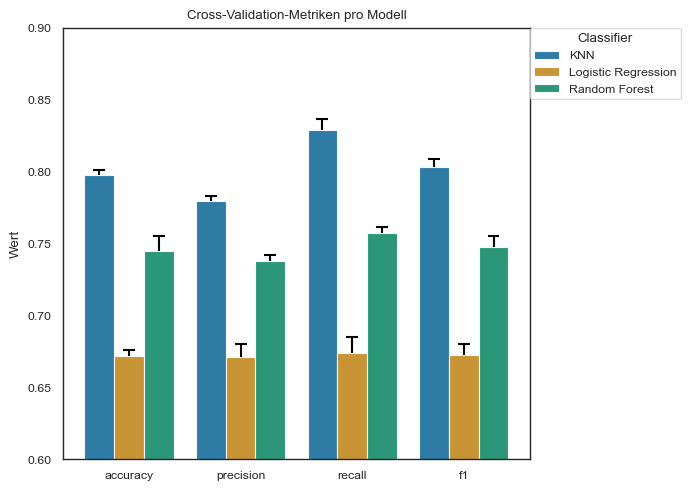

Plots gespeichert in 'figures/' als tiff (Timestamp: 20250514_064836)


In [16]:
plot_cv_metrics_bar(
    df,
    metrics=["accuracy", "precision", "recall", "f1"],
    output_dir="figures",
    filename_prefix="Metrics_Barplot",
    ext="tiff",
    font_scale=1.0,
    save_fig=SAVE_FIGS
)